In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo
wholesale_customers = fetch_ucirepo(id=292) 

In [3]:
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets

In [4]:
datos = X.join(y)
datos.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


In [5]:
datos.isna().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64

In [6]:
datos.shape

(440, 8)

In [7]:
from sklearn.cluster import KMeans

In [8]:
inerciaL = []
cluster_max = 15
for k in range(2, cluster_max+1):
    model = KMeans(n_clusters = k)
    model.fit(X)
    inerciaL.append(model.inertia_)

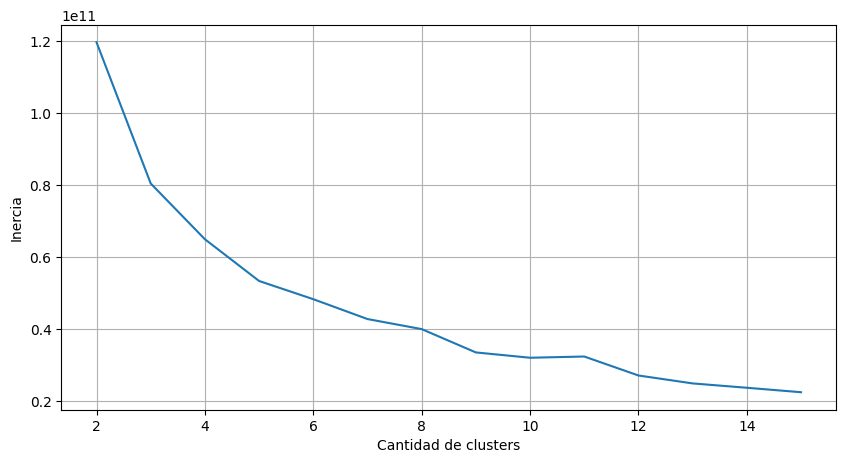

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, cluster_max+1), inerciaL)
plt.xlabel("Cantidad de clusters")
plt.ylabel("Inercia")
plt.grid(True)

In [11]:
model = KMeans(n_clusters = 6)
model.fit(X)

KMeans(n_clusters=6)

In [13]:
datos['cluster'] = model.labels_
datos.head(n=10)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,cluster
0,2,12669,9656,7561,214,2674,1338,3,2
1,2,7057,9810,9568,1762,3293,1776,3,2
2,2,6353,8808,7684,2405,3516,7844,3,2
3,1,13265,1196,4221,6404,507,1788,3,0
4,2,22615,5410,7198,3915,1777,5185,3,1
5,2,9413,8259,5126,666,1795,1451,3,0
6,2,12126,3199,6975,480,3140,545,3,0
7,2,7579,4956,9426,1669,3321,2566,3,2
8,1,5963,3648,6192,425,1716,750,3,0
9,2,6006,11093,18881,1159,7425,2098,3,2


In [14]:
resumen = datos.groupby('cluster').mean().round(1)
resumen

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
cluster,,,,,,,,
0,1.1,6397.6,2478.2,3057.4,2666.1,739.4,881.2,2.5
1,1.2,21402.3,3883.1,5216.5,4157.2,1137.2,1701.2,2.5
2,1.8,4361.1,8557.6,12331.1,1394.8,5262.2,1476.2,2.6
3,2.0,6683.1,17468.0,26658.9,1986.3,11872.9,2531.2,2.4
4,1.1,49330.7,6823.3,6338.5,9666.1,950.9,4557.7,2.7
5,2.0,25603.0,43460.6,61472.2,2636.0,29974.2,2708.8,2.8


<Axes: xlabel='cluster'>

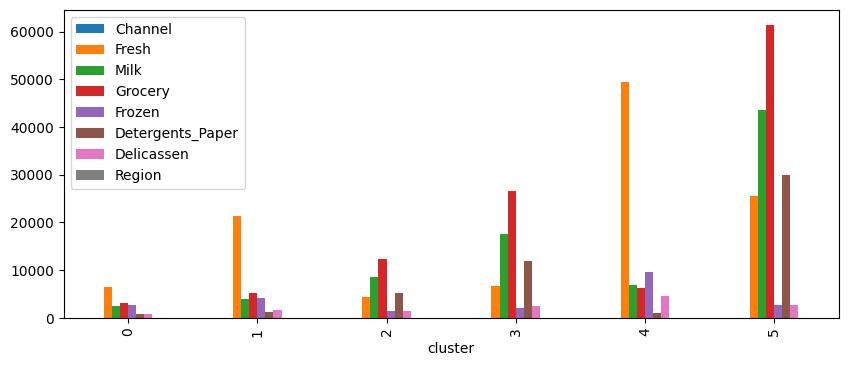

In [15]:
resumen.plot.bar(figsize=(10, 4))

In [16]:
normalizado = (resumen - resumen.min()) / (resumen.max() - resumen.min())

<Axes: ylabel='cluster'>

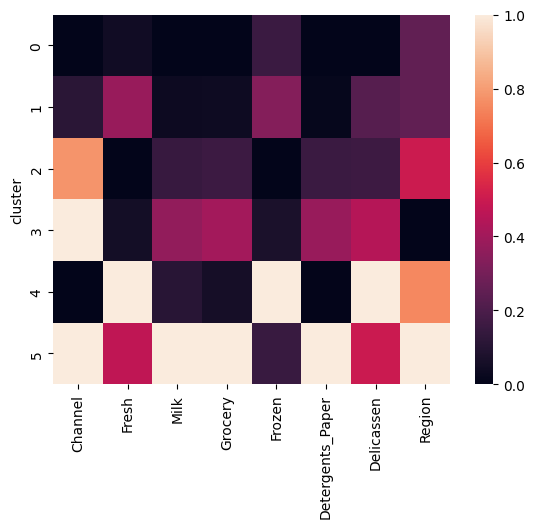

In [17]:
import seaborn as sns
sns.heatmap(normalizado)